# IMAGPRO MP1 Digital Images and DSP

Frances Danielle B. Solis
S12

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Matrix Analysis

Read images and place the images into an array

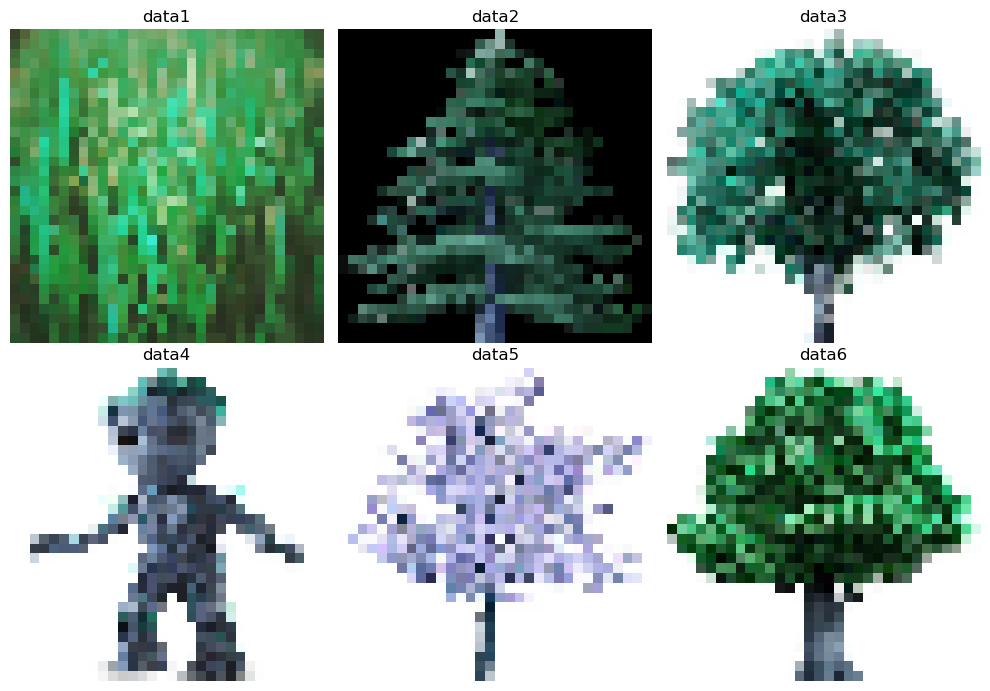

(6, 32, 32, 3)


In [17]:
# Read images and place them into an array
img_paths = ['data1.jpg', 'data2.png', 'data3.jpg', 'data4.jpg', 'data5.jpg', 'data6.jpg']
imgs = [cv.imread(img_path) for img_path in img_paths]

# Resize images to 32x32
resized_imgs = [cv.resize(img, (32, 32)) for img in imgs]

# Stack images into a single variable
aggregated = np.stack(resized_imgs, axis=0)

# Create a figure and axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

# Display the images
for i, ax in enumerate(axes.flat):
    ax.imshow(aggregated[i])
    ax.axis('off')
    ax.set_title(f'data{i+1}')
    
# Show the plot
plt.tight_layout()
plt.show()

#Verify variable shape
print(aggregated.shape)

As seen above, the images are all the same shape because they were all resized to 32x32 matrices. Because of this resize, the images are now very blurry and it can be seen that the images are now of a cooler tone. I think this is most noticeable in image `data5` because the original image is of a sakura tree which is pink and warm but is now an icy purplish blue in the resized version.

The shape of the `aggregated` variable is (6,32,32,3) because it has 6 images, each with a resolution of 32x32, and 3 color channels (RGB).

## Image Statistics

Get the number of pixels of the `data1` or the first image

In [7]:
# Convert the image to floating point
img = aggregated[0].astype(np.float32)

# Normalize image
normalize = cv.normalize(img, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
normalize_img = (normalize * 255).astype(np.uint8)

# Get dimensions of the image
height, width, channels = normalize.shape

# Compute for number of pixels and average pixel per channel
pixels = height * width
avg_pixel = np.mean(normalize, axis=(0, 1))

# Print Results
print(f"The image has {pixels} pixels.")
print(f"The average pixel value per channel is: {avg_pixel}")

The image has 1024 pixels.
The average pixel value per channel is: [0.18094356 0.5259441  0.24117848]
where [Red, Green, Blue]


As seen above, there are 1024 pixels in the image. The average pixel for the red channel is 0.1809, 0.5259 for green, and 0.2412 for blue.

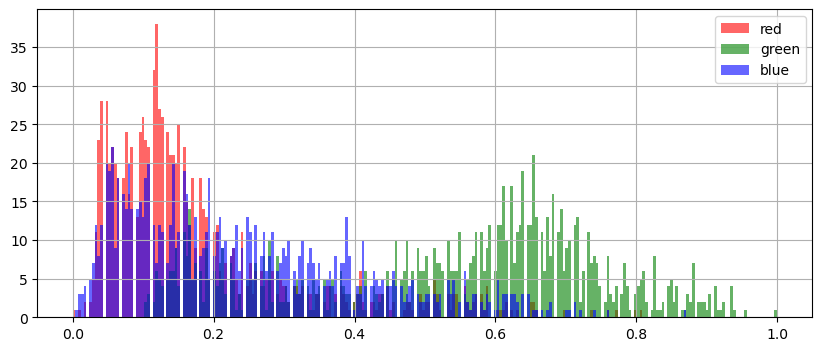

In [36]:
# Get the RGB values of the normalized image
r, g, b = cv.split(normalize_img)

# Divide each channel by 255 to get pixel values from 0.0-1.0
r = r / 255
g = g / 255
b = b / 255

# Plot histogram
plt.figure(figsize=(10,4))
plt.hist(r.ravel(), 256, [0.0,1], label='red', color='red', alpha=0.6)
plt.hist(g.ravel(), 256, [0.0,1], label='green', color='green', alpha=0.6)
plt.hist(b.ravel(), 256, [0.0,1], label='blue', color='blue', alpha=0.6)
plt.legend()
plt.grid()
plt.show()

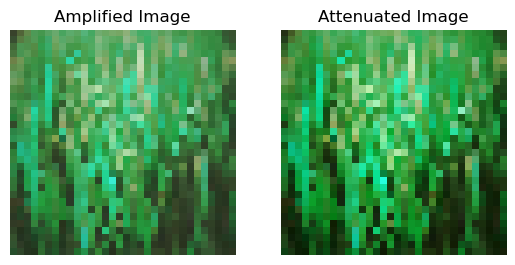

In [46]:
# Create a figure and axis
fig, ax = plt.subplots(1, 2)

# Display the images
ax[0].imshow(aggregated[0])
ax[0].set_title('Original Data1')
ax[0].axis('off')

ax[1].imshow(normalize_img)
ax[1].set_title('Normalized Data1')
ax[1].axis('off')

# Show the plot
plt.show()

Normalizing the image brings back the warmth or vibrancy of the image.

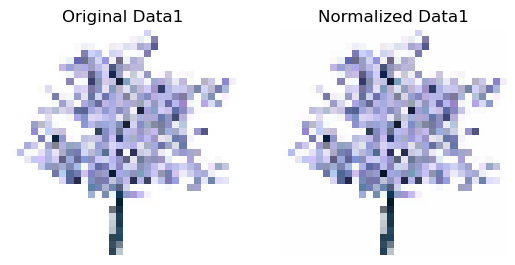

In [51]:
# Normalize image 5
img5 = aggregated[4].astype(np.float32)
normalize5 = cv.normalize(img5, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
normalize_img5 = (normalize5 * 255).astype(np.uint8)

# Create a figure and axis
fig, ax = plt.subplots(1, 2)

# Display the images
ax[0].imshow(aggregated[4])
ax[0].set_title('Original Data1')
ax[0].axis('off')

ax[1].imshow(normalize_img5)
ax[1].set_title('Normalized Data1')
ax[1].axis('off')

# Show the plot
plt.show()

In [45]:
# Get count of values that are equal to 0.5 and less than 0.5
count_r = np.count_nonzero((r <= 0.5))
count_g = np.count_nonzero((g <= 0.5))
count_b = np.count_nonzero((b <= 0.5))

print('R channel values that are less than or equal to 0.5:', count_r)
print('G channel values that are less than or equal to 0.5:', count_g)
print('B channel values that are less than or equal to 0.5:', count_b)

R channel values that are less than or equal to 0.5: 963
G channel values that are less than or equal to 0.5: 396
B channel values that are less than or equal to 0.5: 932


The red and blue channels has the most pixels that are values at 0.5 or less. This is evident in the average pixel value of the channela and by visualization. Image `data1` is primarily green and it shows through to the pixel values, where the green channel has more pixels of higher value.

# Basic Signal Processing

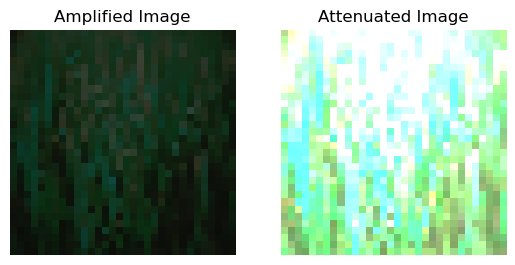

In [9]:
# Convert the image to floating point
image = aggregated[0].astype(np.float32)

# Apply amplification operation
amplified_image = cv.multiply(image, 0.3)

# Apply attenuation operation
attenuated_image = cv.multiply(image, 1.0 / 0.3)

# Convert the images back to unsigned 8-bit integer
amplified_image = np.clip(amplified_image, 0, 255).astype(np.uint8)
attenuated_image = np.clip(attenuated_image, 0, 255).astype(np.uint8)

# Create a figure and axis
fig, ax = plt.subplots(1, 2)

# Display the images
ax[0].imshow(amplified_image)
ax[0].set_title('Amplified Image')
ax[0].axis('off')

ax[1].imshow(attenuated_image)
ax[1].set_title('Attenuated Image')
ax[1].axis('off')

# Show the plot
plt.show()

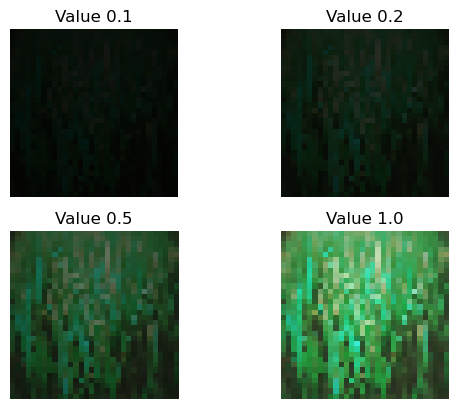

In [10]:
# Perform element-wise multiplication
multiplied_image_01 = cv.multiply(image, 0.1)
multiplied_image_02 = cv.multiply(image, 0.2)
multiplied_image_05 = cv.multiply(image, 0.5)
multiplied_image_10 = cv.multiply(image, 1.0)

# Convert the images back to unsigned 8-bit integer
multiplied_image_01 = np.clip(multiplied_image_01, 0, 255).astype(np.uint8)
multiplied_image_02 = np.clip(multiplied_image_02, 0, 255).astype(np.uint8)
multiplied_image_05 = np.clip(multiplied_image_05, 0, 255).astype(np.uint8)
multiplied_image_10 = np.clip(multiplied_image_10, 0, 255).astype(np.uint8)

# Create a figure and axis
fig, ax = plt.subplots(2, 2)

# Display the images
ax[0, 0].imshow(multiplied_image_01)
ax[0, 0].set_title('Value 0.1')
ax[0, 0].axis('off')

ax[0, 1].imshow(multiplied_image_02)
ax[0, 1].set_title('Value 0.2')
ax[0, 1].axis('off')

ax[1, 0].imshow(multiplied_image_05)
ax[1, 0].set_title('Value 0.5')
ax[1, 0].axis('off')

ax[1, 1].imshow(multiplied_image_10)
ax[1, 1].set_title('Value 1.0')
ax[1, 1].axis('off')

# Show the plot
plt.show()

In [11]:
# Print the values of the matrices
print('Multiplied Image 0.1:')
print(multiplied_image_01)
print('Multiplied Image 0.2:')
print(multiplied_image_02)
print('Multiplied Image 0.5:')
print(multiplied_image_05)
print('Multiplied Image 1.0:')
print(multiplied_image_10)

Multiplied Image 0.1:
[[[ 5  6  4]
  [ 8 10  5]
  [ 9 13  7]
  ...
  [ 5 12  6]
  [ 5  8  5]
  [ 5  8  4]]

 [[ 5  7  4]
  [ 8 12  6]
  [ 8 13  7]
  ...
  [ 5 13  6]
  [ 5  9  5]
  [ 5  8  4]]

 [[ 6 10  5]
  [ 7 14  8]
  [ 7 14  7]
  ...
  [ 5 13  6]
  [ 6 12  6]
  [ 5  9  5]]

 ...

 [[ 5  8  4]
  [ 3  5  3]
  [ 4  5  3]
  ...
  [ 3  5  3]
  [ 3  5  3]
  [ 3  6  3]]

 [[ 5  8  4]
  [ 4  5  3]
  [ 3  5  3]
  ...
  [ 4  5  3]
  [ 3  5  2]
  [ 3  5  3]]

 [[ 3  7  4]
  [ 4  7  4]
  [ 3  5  3]
  ...
  [ 4  6  3]
  [ 3  5  3]
  [ 4  5  3]]]
Multiplied Image 0.2:
[[[11 13  8]
  [16 20 11]
  [19 27 14]
  ...
  [10 25 12]
  [10 17 10]
  [11 16  9]]

 [[11 15  9]
  [17 24 13]
  [16 27 14]
  ...
  [11 27 13]
  [10 19 10]
  [11 16  9]]

 [[13 20 11]
  [15 29 16]
  [15 28 15]
  ...
  [11 27 13]
  [12 25 13]
  [10 19 10]]

 ...

 [[10 16  9]
  [ 7 10  6]
  [ 8 11  7]
  ...
  [ 7 10  6]
  [ 7 11  6]
  [ 7 12  7]]

 [[10 16  9]
  [ 9 11  7]
  [ 7 10  6]
  ...
  [ 8 11  7]
  [ 7 10  5]
  [ 7 11  6]]

Values are increasing

In [12]:
# Manually calculate the expected results
expected_image_01 = np.clip(image * 0.1, 0, 255).astype(np.uint8)
expected_image_02 = np.clip(image * 0.2, 0, 255).astype(np.uint8)
expected_image_05 = np.clip(image * 0.5, 0, 255).astype(np.uint8)
expected_image_10 = np.clip(image * 1.0, 0, 255).astype(np.uint8)

# Compare the results
error_01 = np.sum(np.abs(multiplied_image_01 - expected_image_01))
error_02 = np.sum(np.abs(multiplied_image_02 - expected_image_02))
error_05 = np.sum(np.abs(multiplied_image_05 - expected_image_05))
error_10 = np.sum(np.abs(multiplied_image_10 - expected_image_10))

print('Error for 0.1:', error_01)
print('Error for 0.2:', error_02)
print('Error for 0.5:', error_05)
print('Error for 1.0:', error_10)

Error for 0.1: 0
Error for 0.2: 0
Error for 0.5: 0
Error for 1.0: 0


In [15]:
from scipy.spatial.distance import cdist

# Convert the images to floating point
data1 = aggregated[0].astype(np.float32)
data2 = aggregated[1].astype(np.float32)
data3 = aggregated[2].astype(np.float32)
data4 = aggregated[3].astype(np.float32)
data5 = aggregated[4].astype(np.float32)
data6 = aggregated[5].astype(np.float32)

# Compute the Euclidean distances
distances = cdist([data1.flatten(), data2.flatten(), data3.flatten(), data4.flatten(), data5.flatten(), data6.flatten()], 
                  [data1.flatten(), data2.flatten(), data3.flatten(), data4.flatten(), data5.flatten(), data6.flatten()], 
                  metric='euclidean')

print(distances)

[[    0.          4683.09502359  7243.07510661  8201.45377357
   8452.401848    7599.06073143]
 [ 4683.09502359     0.          9162.16011648 11005.53428962
  11495.58523956  9616.29653245]
 [ 7243.07510661  9162.16011648     0.          6333.77162519
   6153.92183896  3855.6347078 ]
 [ 8201.45377357 11005.53428962  6333.77162519     0.
   4508.542891    6270.71303761]
 [ 8452.401848   11495.58523956  6153.92183896  4508.542891
      0.          6009.29987603]
 [ 7599.06073143  9616.29653245  3855.6347078   6270.71303761
   6009.29987603     0.        ]]


In [16]:
print(f'distance between 1 and 3 is {distances[0][2]}')
print(f'distance between 1 and 5 is {distances[0][4]}')
print(f'distance between 3 and 5 is {distances[2][4]}')

distance between 1 and 3 is 7243.075106610451
distance between 1 and 5 is 8452.401847995634
distance between 3 and 5 is 6153.921838957658
